In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb

from sklearn.impute import SimpleImputer
from IPython.display import display
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
olist_customer = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')

'\nolist_customers_dataset.csv:'

'Head:'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


'\nTail:'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99431,be842c57a8c5a62e9585dd72f22b6338,ca186065de6e2d01cfc99763e6d62048,99150,marau,RS
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
99433,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,66033,belem,PA
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


'\nShape:'

(99441, 5)

'\nDescribe:'

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


'\nSize:'

497205

'\nHistogram:'

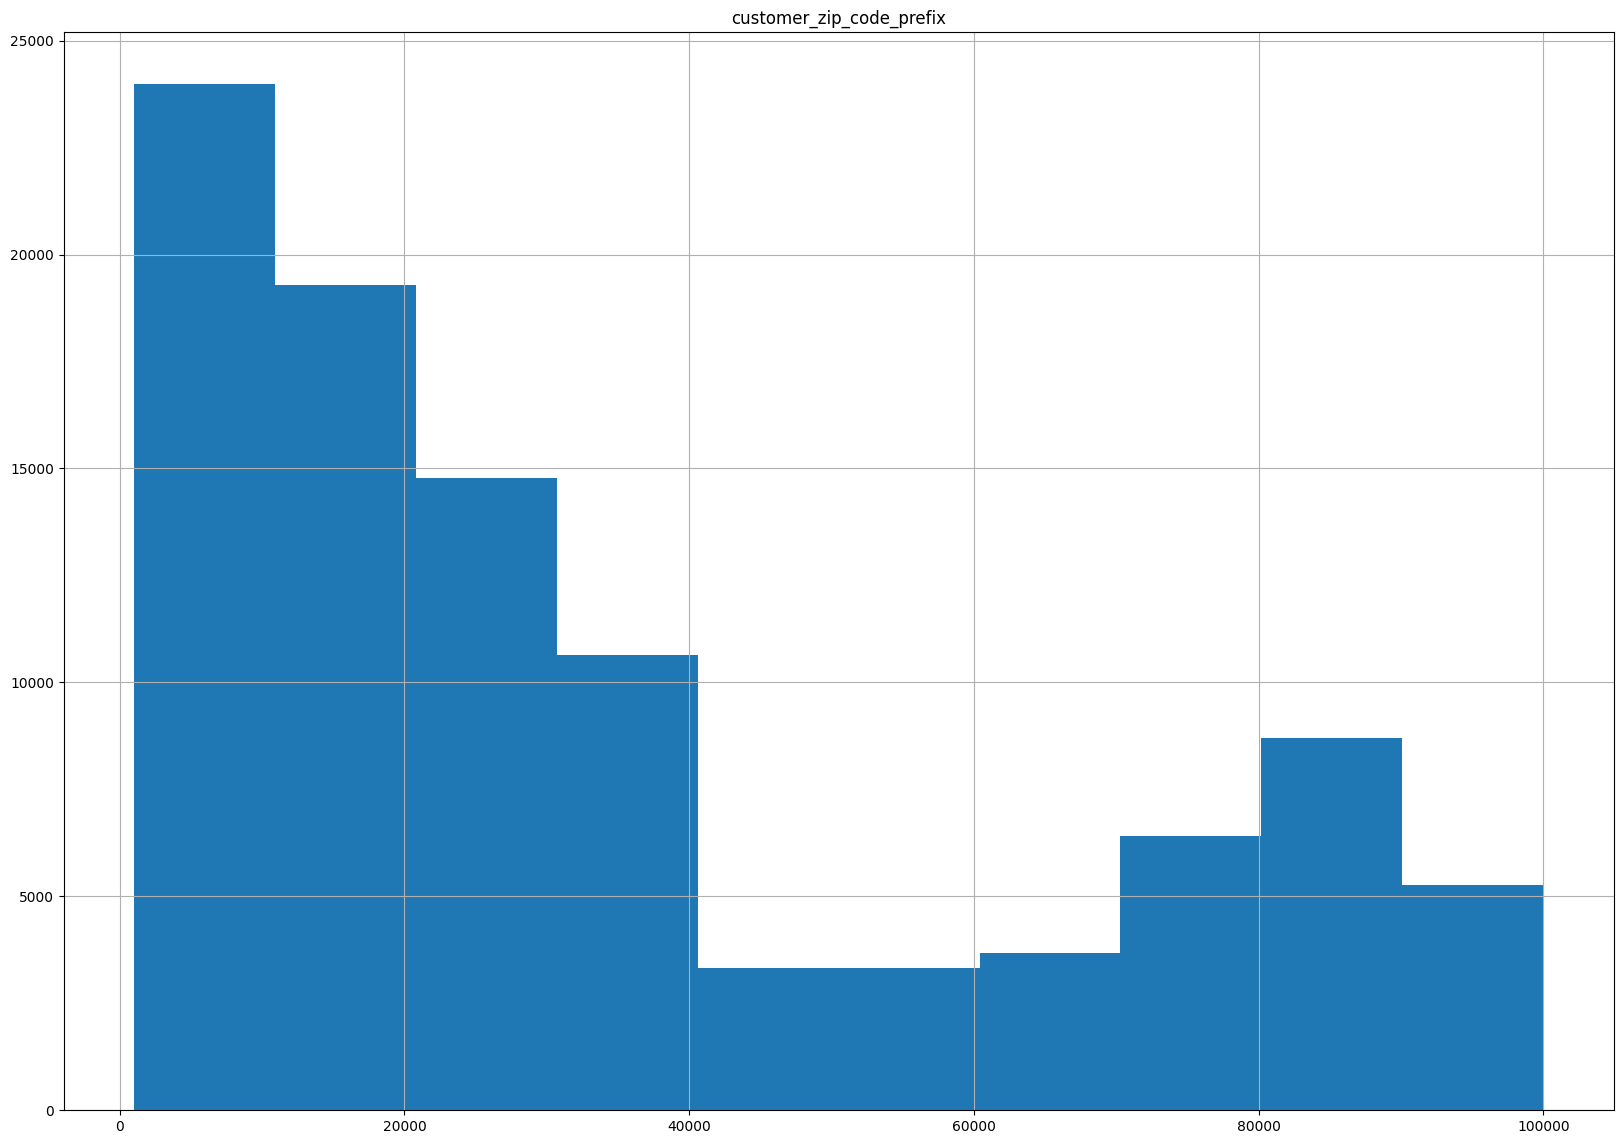

'\nColumns:'

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

'\nNull values:'

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

'\nolist_geolocation_dataset.csv:'

'Head:'

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


'\nTail:'

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


'\nShape:'

(1000163, 5)

'\nDescribe:'

,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,11075.000000,26530.000000,63504.000000,99990.000000
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.979620,45.065933
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394


'\nSize:'

5000815

'\nHistogram:'

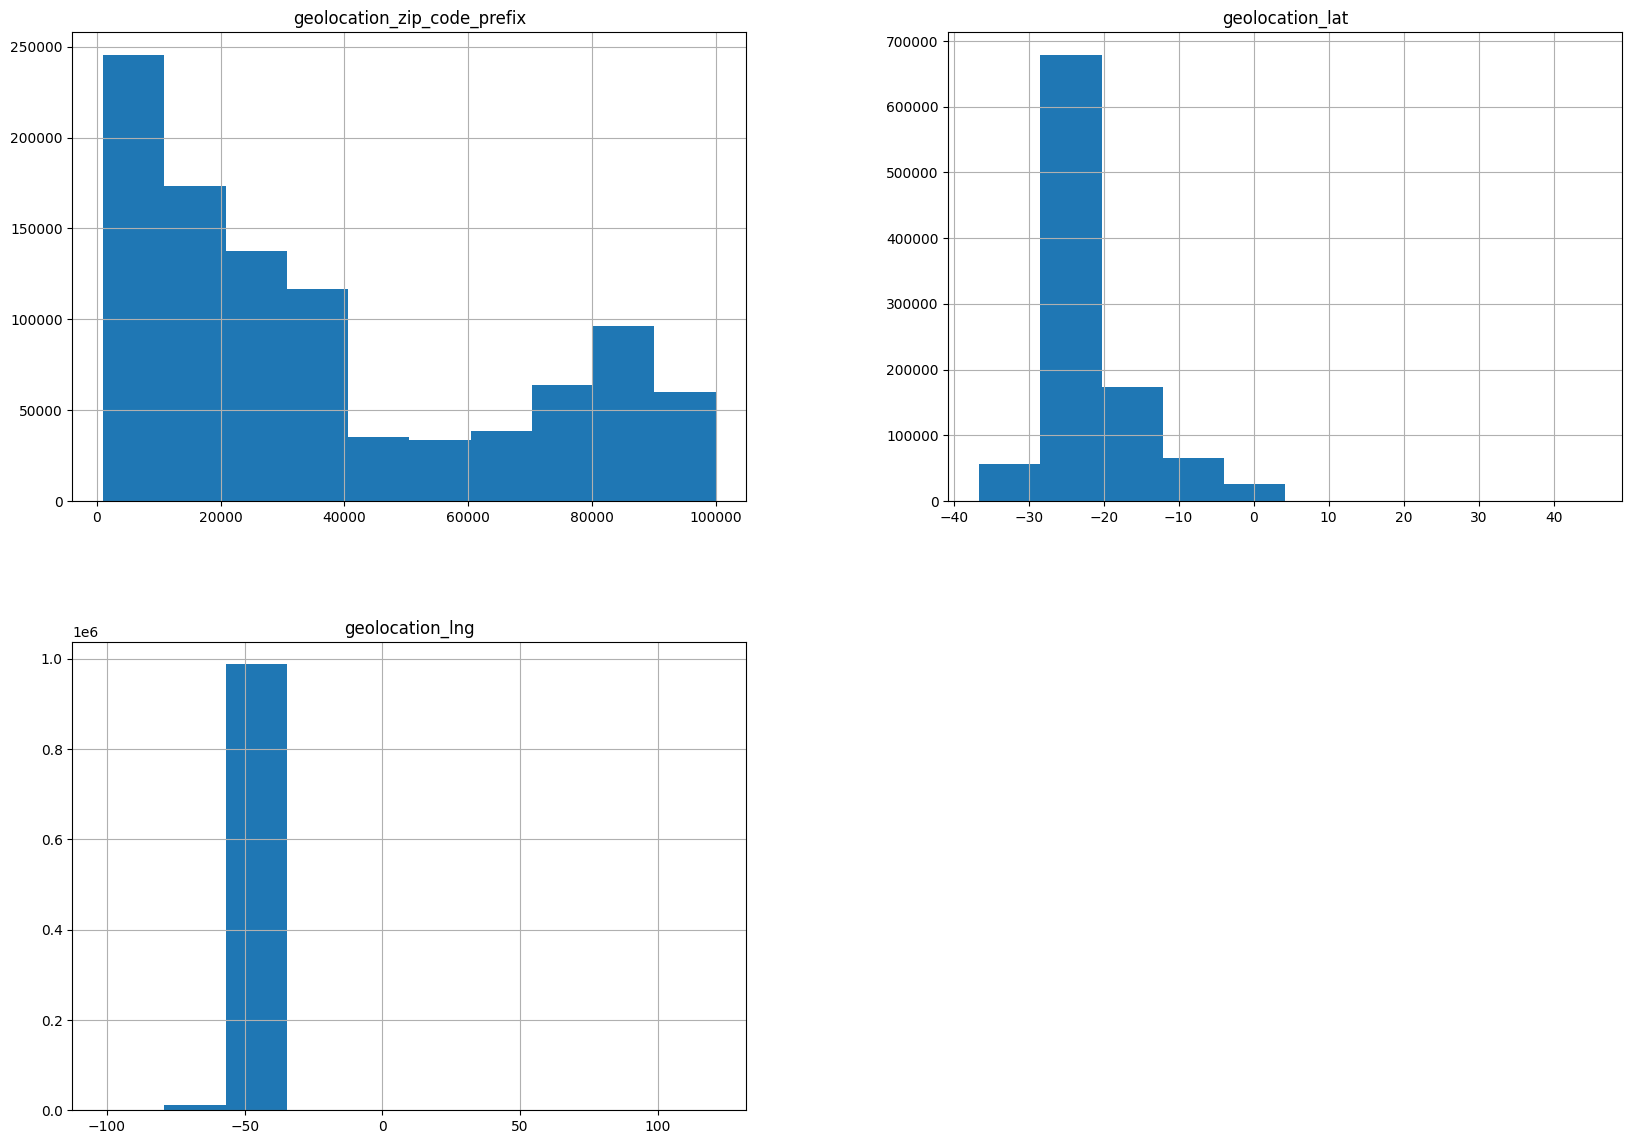

'\nColumns:'

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

'\nNull values:'

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

'\nolist_orders_dataset.csv:'

'Head:'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


'\nTail:'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99431,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,2017-11-22 00:00:00
99432,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


'\nShape:'

(99441, 8)

'\nDescribe:'

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


'\nSize:'

795528

'\nHistogram:'

'\nColumns:'

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

'\nNull values:'

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

'\nolist_order_items_dataset.csv:'

'Head:'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


'\nTail:'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


'\nShape:'

(112650, 7)

'\nDescribe:'

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


'\nSize:'

788550

'\nHistogram:'

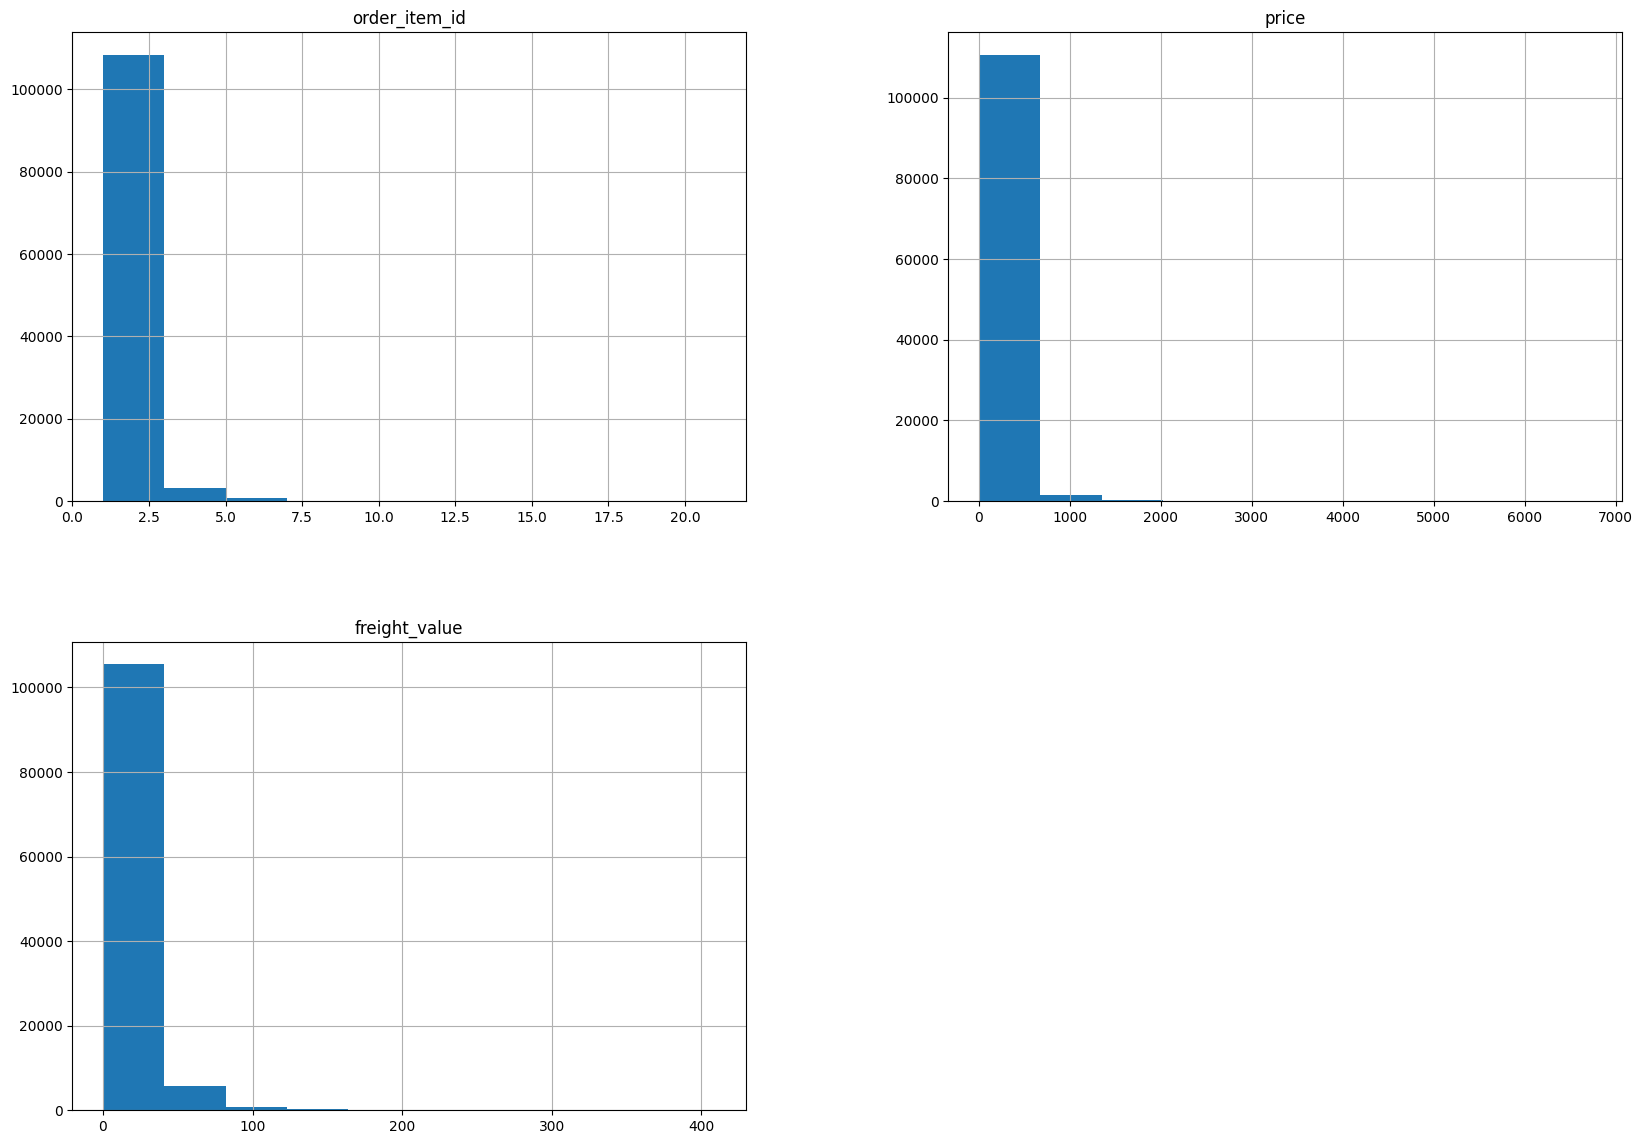

'\nColumns:'

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

'\nNull values:'

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

'\nolist_order_payments_dataset.csv:'

'Head:'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


'\nTail:'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103876,0872d0faafe0cb56e6f2c594cca1522c,1,credit_card,2,127.92
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103878,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


'\nShape:'

(103886, 5)

'\nDescribe:'

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


'\nSize:'

519430

'\nHistogram:'

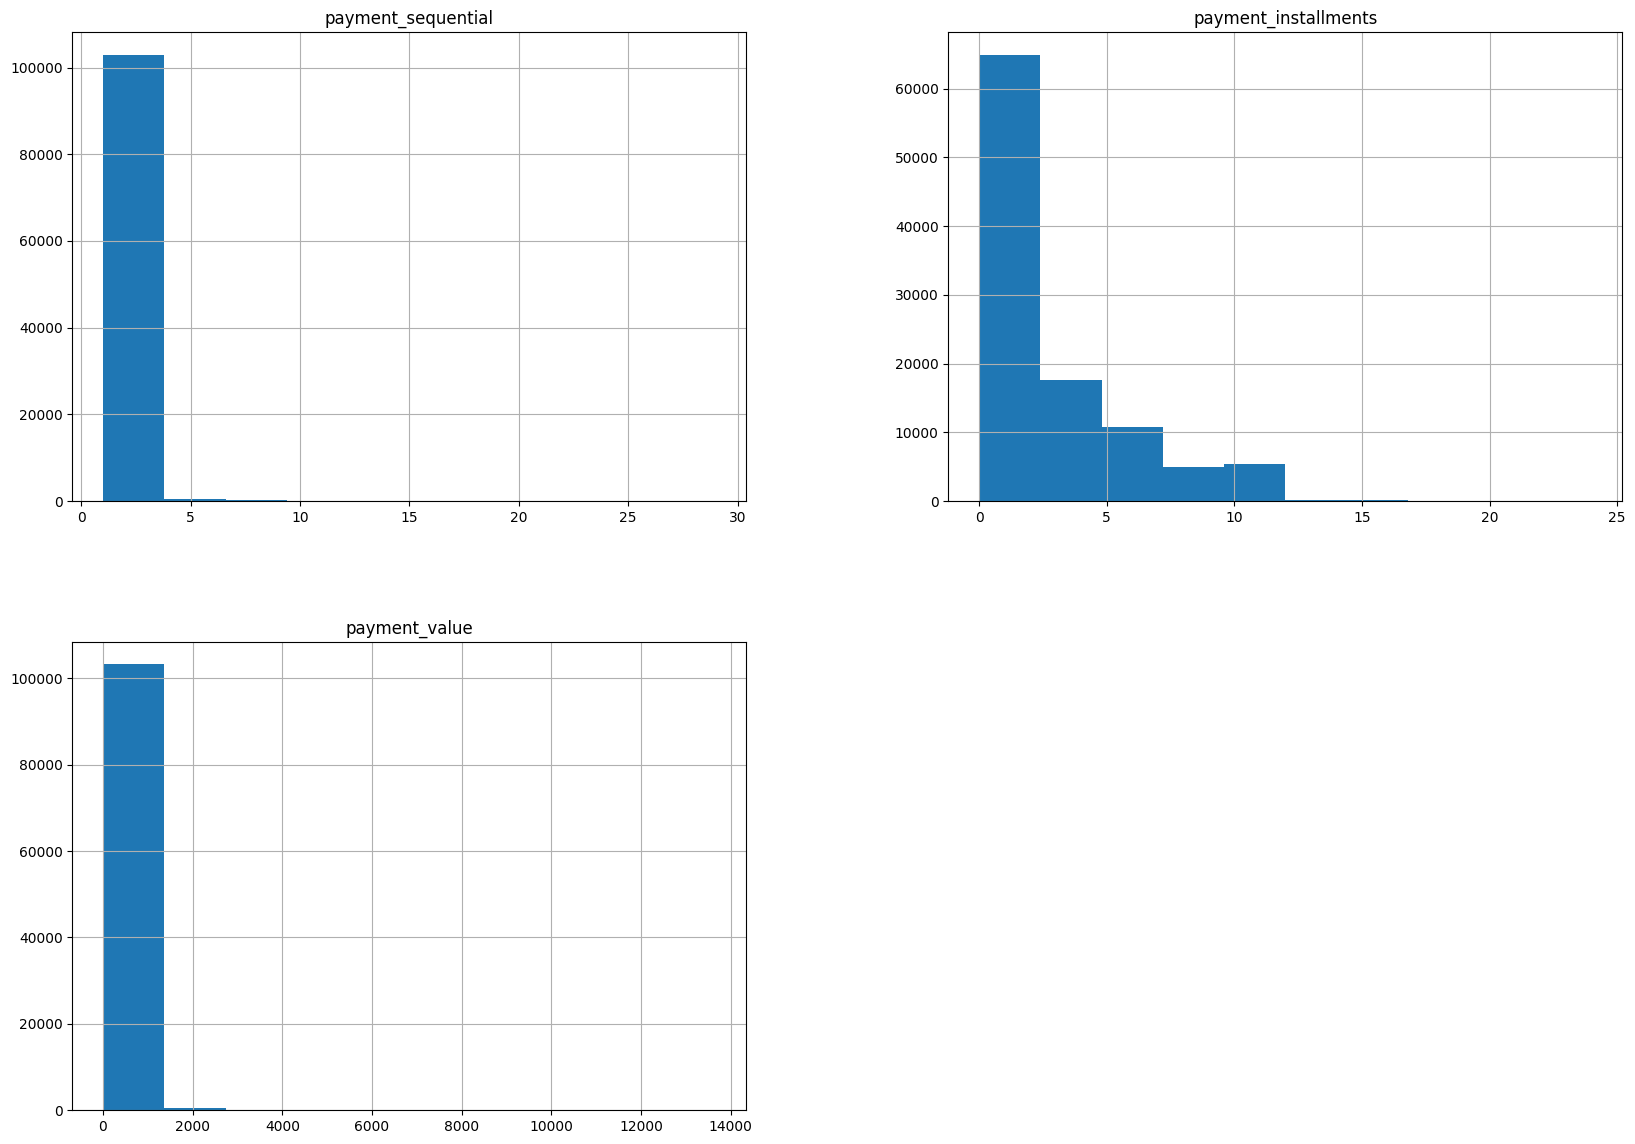

'\nColumns:'

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

'\nNull values:'

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

'\nolist_order_reviews_dataset.csv:'

'Head:'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


'\nTail:'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99214,3c569245c7610d9a51eff50032194ea3,bf25ff262495b0b876bc4f594f736ecf,5,NaN,NaN,2018-05-23 00:00:00,2018-05-26 21:24:06
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
99216,115d72425fc59eec9a2e9d7594c6d93d,acd45245723df7cb52772a34416b41b1,3,NaN,NaN,2018-05-08 00:00:00,2018-05-10 14:37:03
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


'\nShape:'

(99224, 7)

'\nDescribe:'

,count,mean,std,min,25%,50%,75%,max
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0


'\nSize:'

694568

'\nHistogram:'

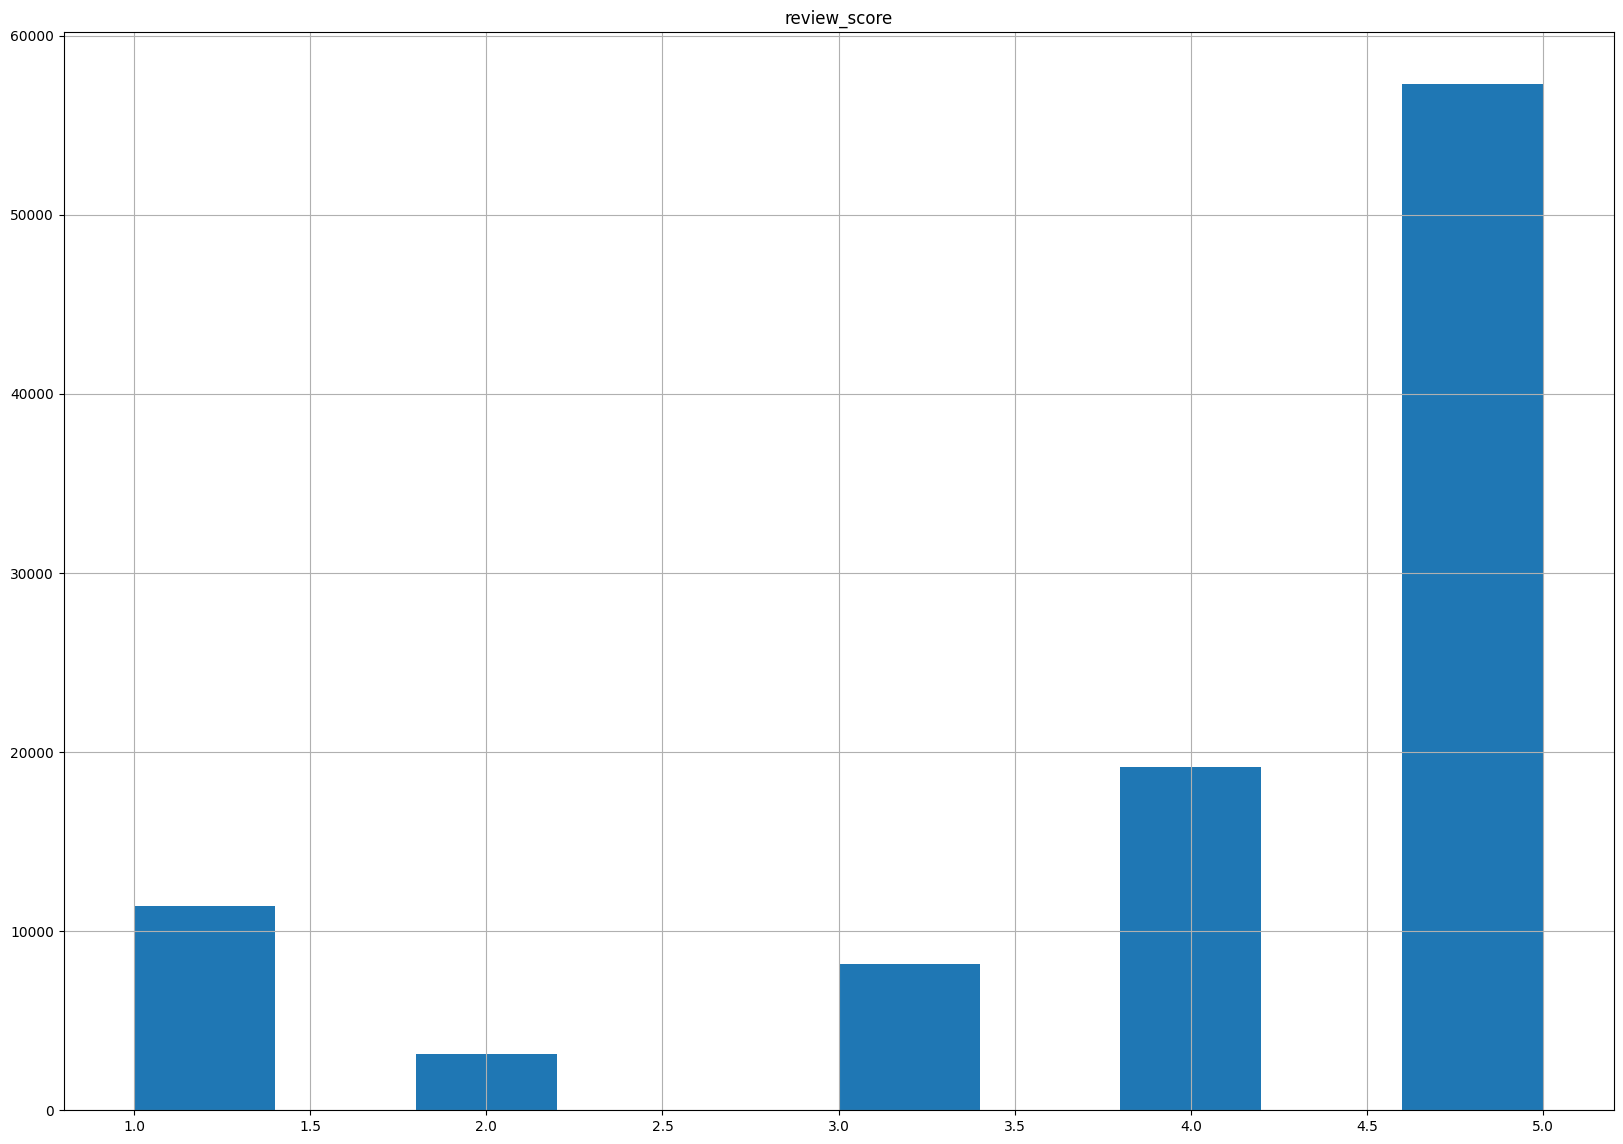

'\nColumns:'

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

'\nNull values:'

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

'\nolist_products_dataset.csv:'

'Head:'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


'\nTail:'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32941,6ec96c91757fad0aecafc0ee7f262dcc,bebes,62.0,1417.0,1.0,9550.0,36.0,35.0,35.0
32942,16280ca280a86fee2ba3c928ed04439f,moveis_decoracao,64.0,236.0,11.0,2200.0,31.0,11.0,26.0
32943,3becff10d1deb92b02f2a1ee62a04524,informatica_acessorios,54.0,1520.0,2.0,6150.0,30.0,30.0,20.0
32944,1a14237ecc2fe3772b55c8d4e11ccb35,moveis_decoracao,58.0,1405.0,3.0,150.0,35.0,2.0,25.0
32945,c4e71b64511b959455e2107fe7859020,utilidades_domesticas,59.0,1371.0,2.0,200.0,18.0,15.0,15.0
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


'\nShape:'

(32951, 9)

'\nDescribe:'

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


'\nSize:'

296559

'\nHistogram:'

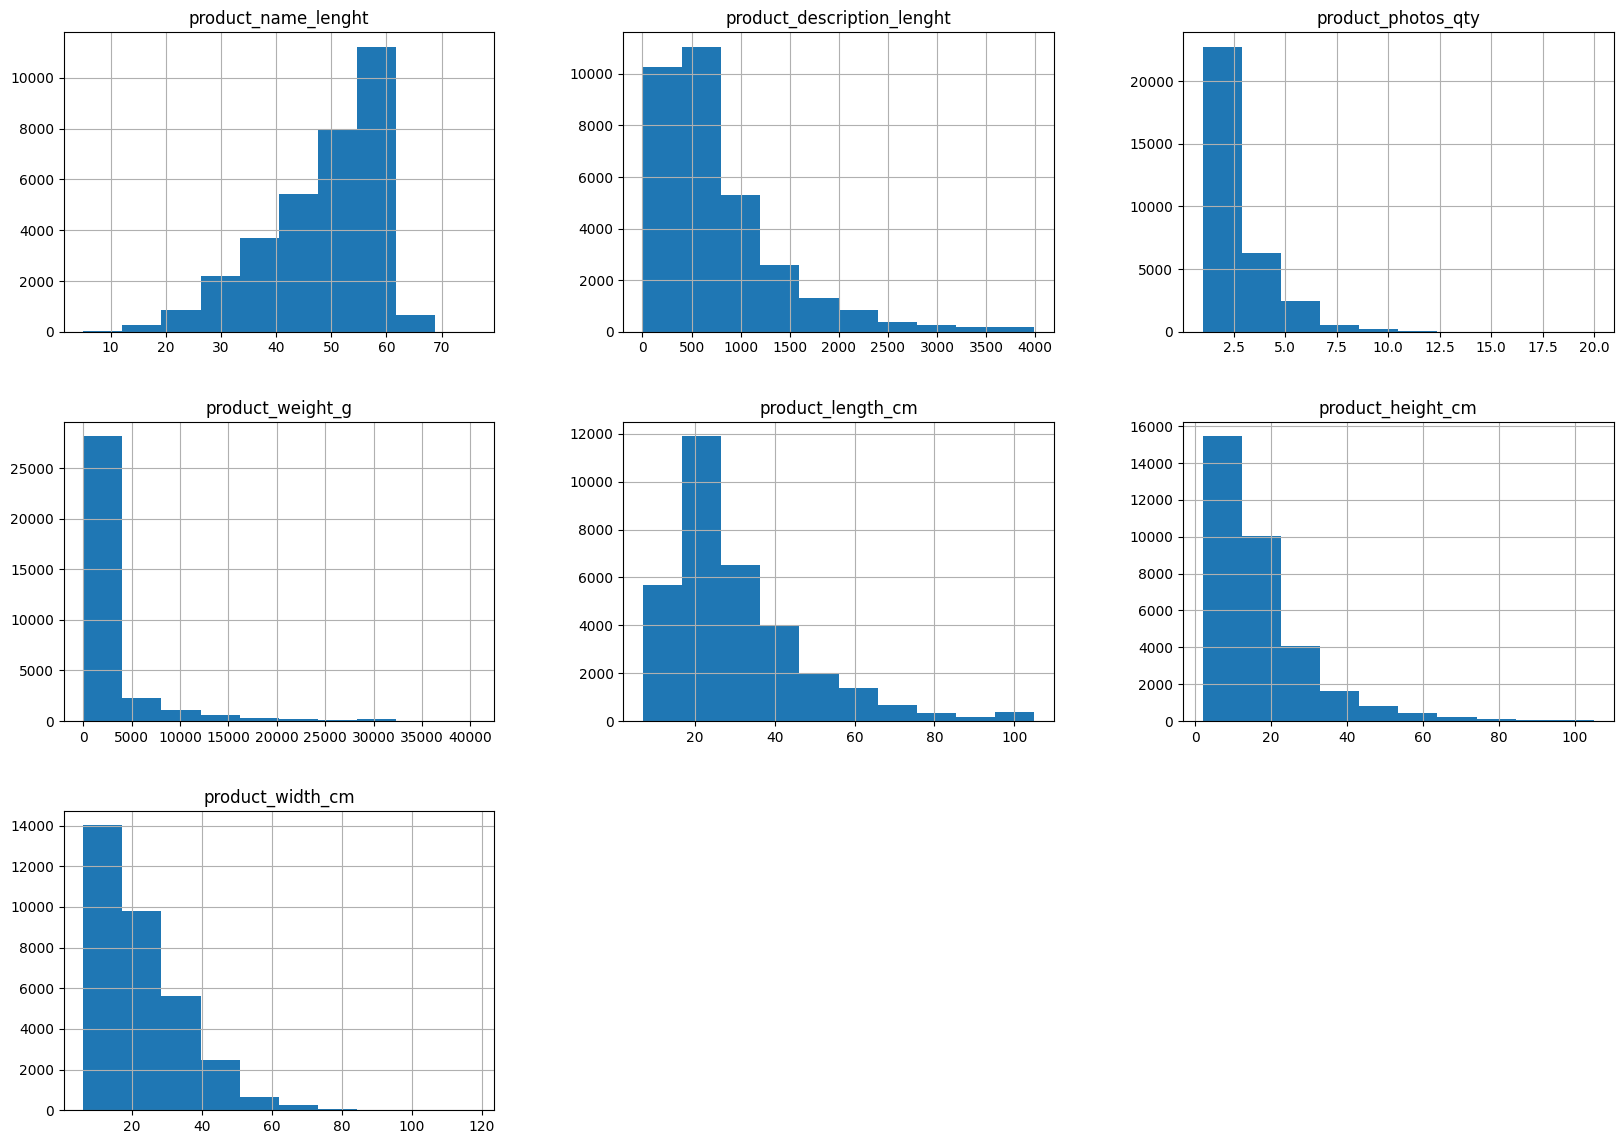

'\nColumns:'

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

'\nNull values:'

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

'\nolist_sellers_dataset.csv:'

'Head:'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


'\nTail:'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3085,9d489893ff6af05029671b785f54b998,13613,leme,SP
3086,725af026f869236a8dd0ceb98564d156,35530,claudio,MG
3087,f00f5b35d0abcacbdd863672f4bb2c1a,1238,sao paulo,SP
3088,7bac63f6603d382cc8d0832eb6c100a8,5713,sao paulo,SP
3089,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


'\nShape:'

(3095, 4)

'\nDescribe:'

,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,3095.0,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0


'\nSize:'

12380

'\nHistogram:'

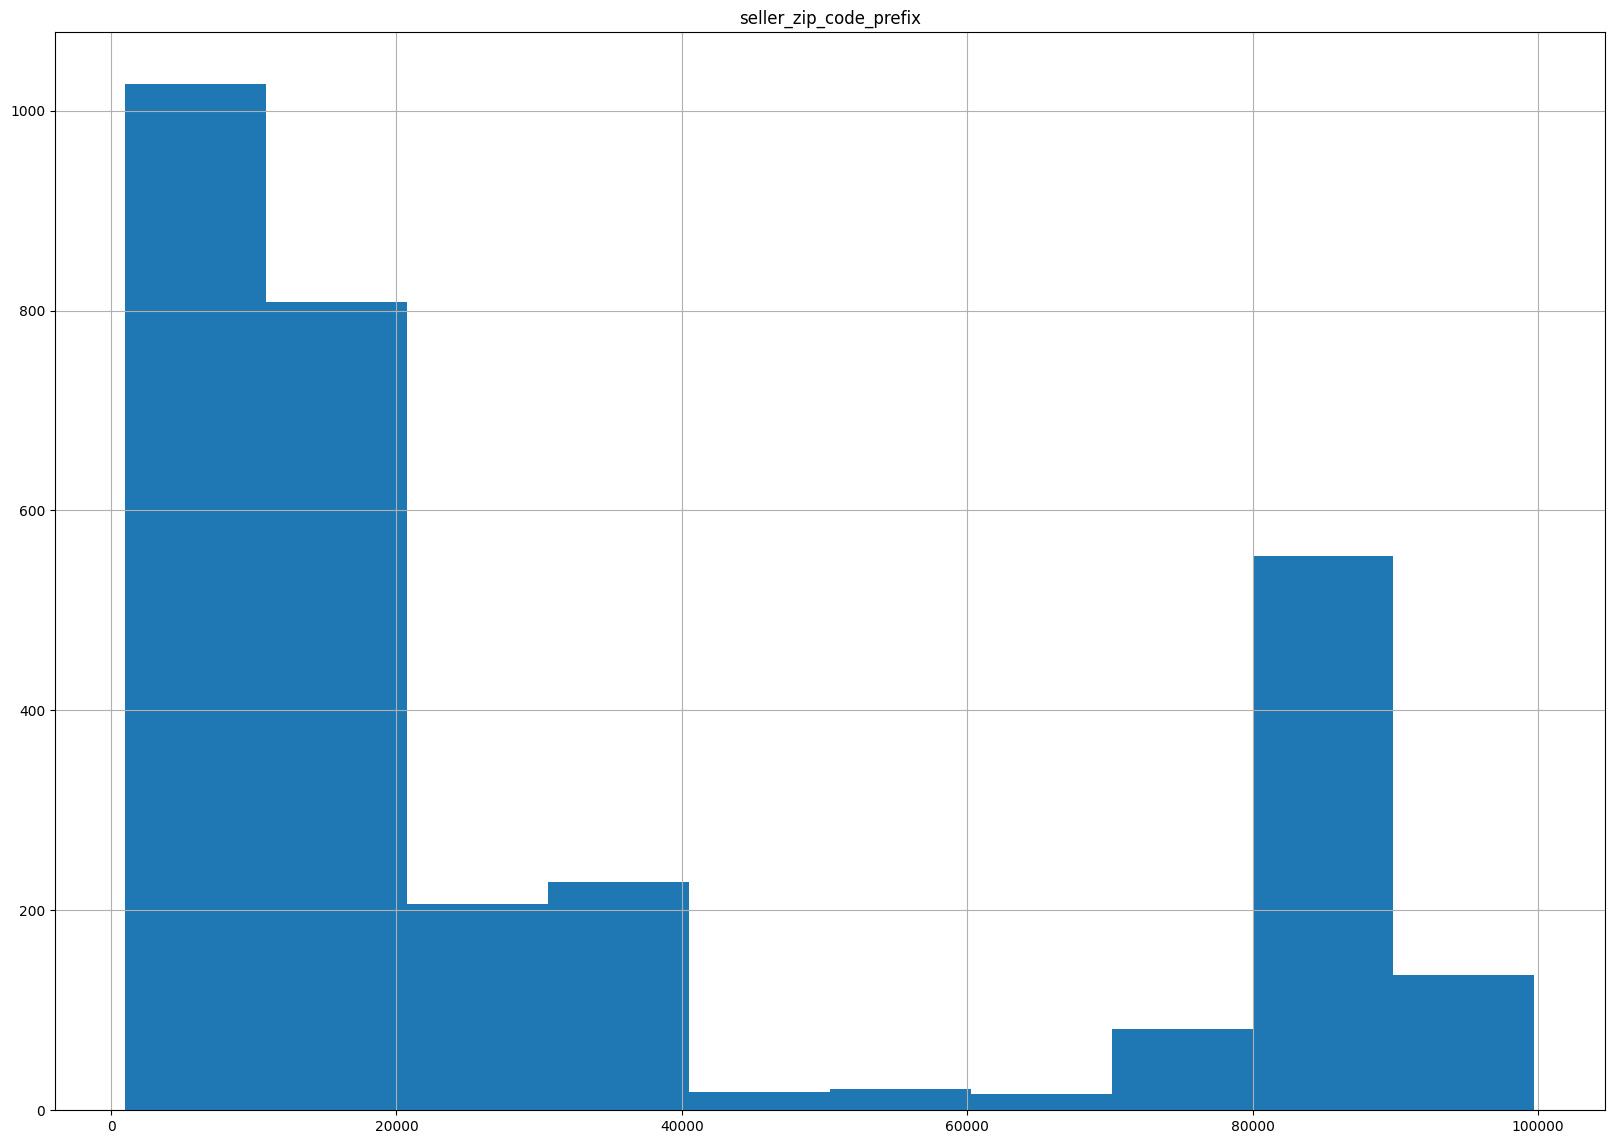

'\nColumns:'

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

'\nInfo:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

'\nNull values:'

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [3]:
dataframes = {
    'olist_customers_dataset.csv': olist_customer,
    'olist_geolocation_dataset.csv': olist_geolocation,
    'olist_orders_dataset.csv': olist_orders,
    'olist_order_items_dataset.csv': olist_order_items,
    'olist_order_payments_dataset.csv': olist_order_payments,
    'olist_order_reviews_dataset.csv': olist_order_reviews,
    'olist_products_dataset.csv': olist_products,
    'olist_sellers_dataset.csv': olist_sellers
}


for file, df in dataframes.items():
    display(f'\n{file}:')
    display('Head:')
    display(df.head(10))
    display('\nTail:')
    display(df.tail(10))
    display('\nShape:')
    display(df.shape)
    display('\nDescribe:')
    display(df.describe().T)
    display('\nSize:')
    display(df.size)
    display('\nHistogram:')
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_vars) > 0:
        df[num_vars].hist(figsize=(20,14))
        plt.show()
    display('\nColumns:')
    display(df.columns)
    display('\nInfo:')
    display(df.info())
    display('\nNull values:')
    display(df.isnull().sum())

In [4]:
for file, df in dataframes.items():
  
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col].fillna(df[col].mean(), inplace=True)


    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)


    display(f'\n{file} missing values after handling:')
    display(df.isnull().sum())

'\nolist_customers_dataset.csv missing values after handling:'

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

'\nolist_geolocation_dataset.csv missing values after handling:'

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

'\nolist_orders_dataset.csv missing values after handling:'

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

'\nolist_order_items_dataset.csv missing values after handling:'

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

'\nolist_order_payments_dataset.csv missing values after handling:'

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

'\nolist_order_reviews_dataset.csv missing values after handling:'

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

'\nolist_products_dataset.csv missing values after handling:'

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

'\nolist_sellers_dataset.csv missing values after handling:'

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [5]:
for file, df in dataframes.items():
    display(f'\n{file} duplicates:')
    display(df.duplicated().sum())

'\nolist_customers_dataset.csv duplicates:'

0

'\nolist_geolocation_dataset.csv duplicates:'

261831

'\nolist_orders_dataset.csv duplicates:'

0

'\nolist_order_items_dataset.csv duplicates:'

0

'\nolist_order_payments_dataset.csv duplicates:'

0

'\nolist_order_reviews_dataset.csv duplicates:'

0

'\nolist_products_dataset.csv duplicates:'

0

'\nolist_sellers_dataset.csv duplicates:'

0

In [6]:
merged_data = pd.merge(olist_orders, olist_order_reviews, on='order_id', how='inner')
merged_data = pd.merge(merged_data, olist_order_payments, on='order_id', how='inner')
merged_data = pd.merge(merged_data, olist_order_items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, olist_products, on='product_id', how='inner')


    

In [7]:
num_imputer = SimpleImputer(strategy='mean')
for col in merged_data.select_dtypes(include=['float64', 'int64']).columns:
    merged_data[col] = num_imputer.fit_transform(merged_data[[col]]).ravel()


cat_imputer = SimpleImputer(strategy='most_frequent')
for col in merged_data.select_dtypes(include=['object']).columns:
    merged_data[col] = cat_imputer.fit_transform(merged_data[[col]]).ravel()

display(merged_data.isnull().sum())



order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

# How do review scores correlate with product sales?

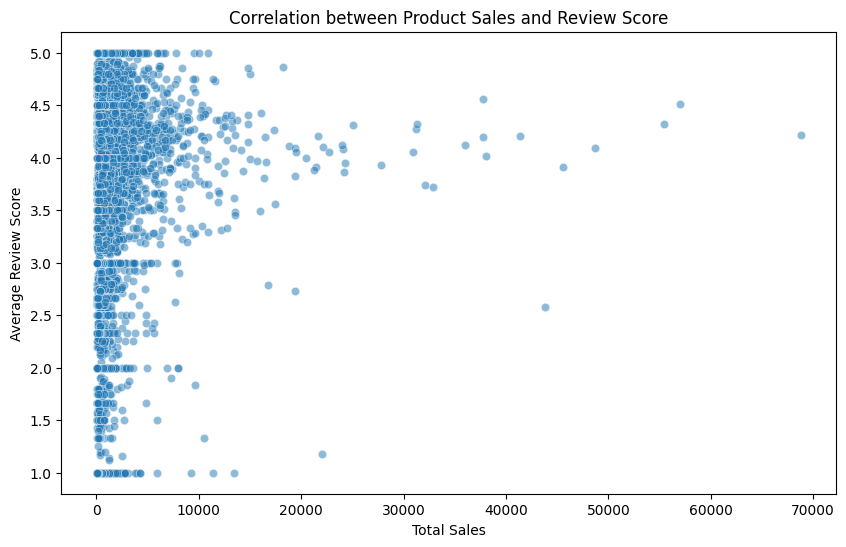

In [8]:
sales_data = merged_data.groupby('product_id').agg({'price': 'sum', 'review_score': 'mean'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='price', y='review_score', alpha=0.5)
plt.title('Correlation between Product Sales and Review Score')
plt.xlabel('Total Sales')
plt.ylabel('Average Review Score')
plt.show()


Analysis:
Each point on the scatter plot represents a product.
The x-axis represents the total sales of the product, while the y-axis represents the average review score.
From the plot, we can observe that there isn't a strong linear correlation between product sales and review scores. This means that high sales don't necessarily equate to high review scores and vice versa.
There are products with high sales but average or below-average review scores, and there are products with low sales but high review scores.

Conclusion:
While sales are an essential metric for business success, customer satisfaction, as indicated by review scores, is equally crucial. A product might have high sales due to effective marketing or a lack of alternatives, but if its review scores are low, it might indicate issues with the product quality, functionality, or other factors. On the other hand, a product with high review scores but low sales might be an undiscovered gem that hasn't reached its potential market. It's essential for businesses to consider both metrics and strategize accordingly.

# What is the distribution of review scores across the dataset?

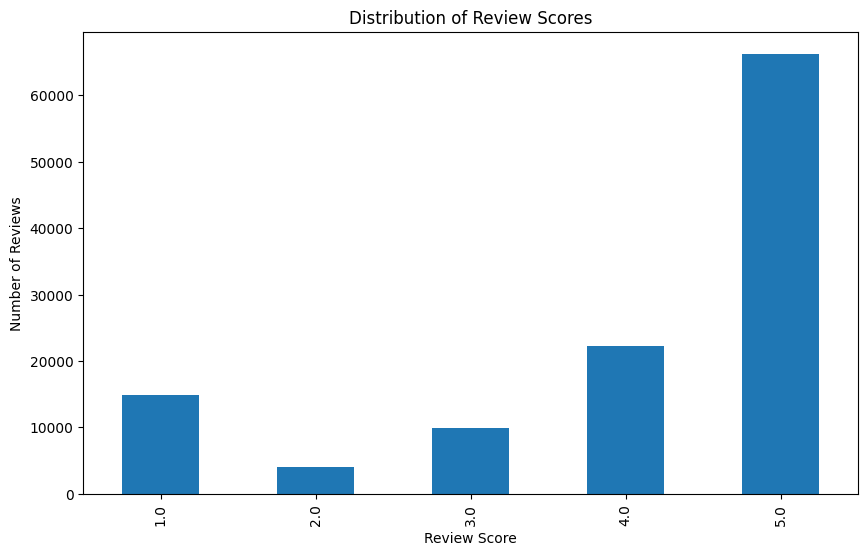

In [9]:
plt.figure(figsize=(10, 6))
merged_data['review_score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Scores')
plt.ylabel('Number of Reviews')
plt.xlabel('Review Score')
plt.show()


Analysis:
The bar chart displays the distribution of review scores in the dataset.
Each bar represents a unique review score, and the height of the bar indicates the number of reviews with that score.
From the visual, we can observe that the majority of reviews have a score of 5, indicating high customer satisfaction. However, there are also a significant number of reviews with lower scores, especially scores of 1 and 2.

Conclusion:
The majority of customers seem satisfied with their purchases, as indicated by the high number of 5-star reviews. However, there's a notable portion of customers who had negative experiences, as seen by the 1 and 2-star reviews. Businesses can delve deeper into these negative reviews to identify and address common issues raised by customers.

# How has the average review score changed over time?

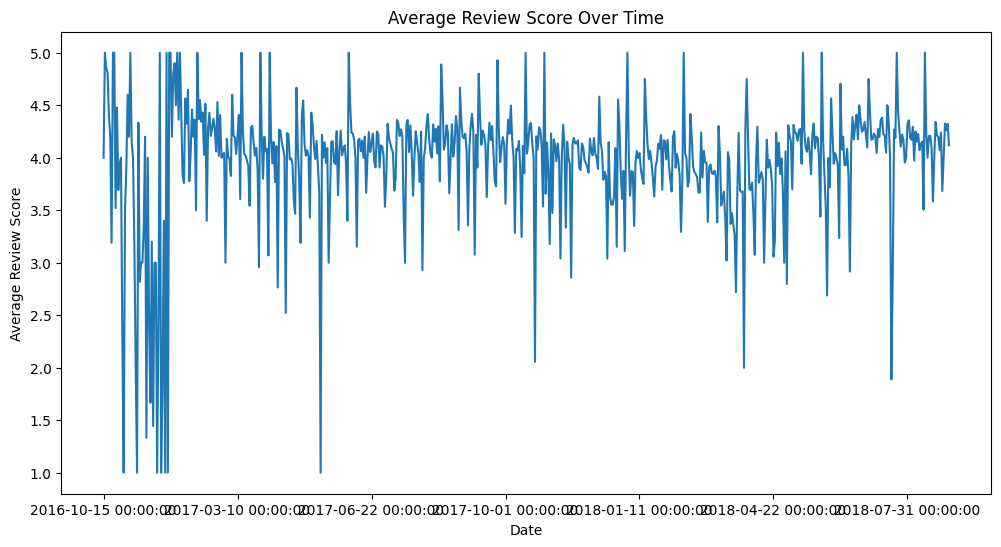

In [10]:
avg_review_over_time = merged_data.groupby('review_creation_date')['review_score'].mean()


plt.figure(figsize=(12, 6))
avg_review_over_time.plot()
plt.title('Average Review Score Over Time')
plt.ylabel('Average Review Score')
plt.xlabel('Date')
plt.show()


Analysis: 
The line chart displays the trend of average review scores over time.
Each point on the line represents the average review score for a specific date.
We can observe fluctuations in the average review score over time, with certain periods showing higher scores and others showing dips.

Conclusion: 
While the overall trend of review scores remains relatively consistent, there are noticeable fluctuations on specific dates. These fluctuations could be due to various factors such as product launches, promotional events, or operational challenges. It's essential for businesses to identify the causes behind significant dips and address them to maintain consistent customer satisfaction.

# What are the number of reviews by day of the week?

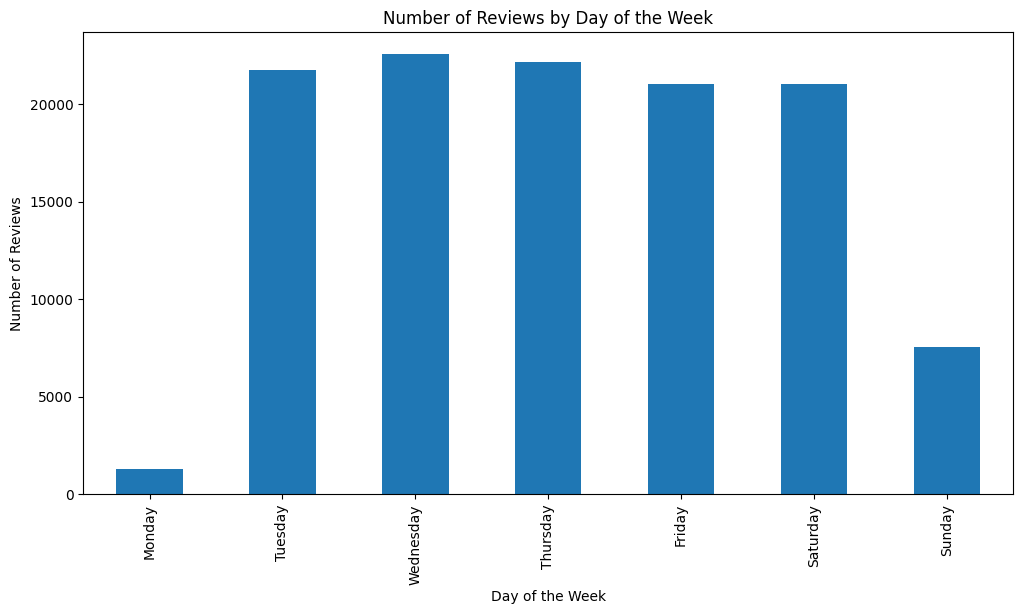

In [11]:
merged_data = pd.merge(olist_orders, olist_order_reviews, on='order_id', how='inner')
merged_data = pd.merge(merged_data, olist_order_payments, on='order_id', how='inner')
merged_data = pd.merge(merged_data, olist_order_items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, olist_products, on='product_id', how='inner')


merged_data['review_creation_date'] = pd.to_datetime(merged_data['review_creation_date'])


merged_data['day_of_week'] = merged_data['review_creation_date'].dt.day_name()


reviews_by_day = merged_data['day_of_week'].value_counts()


plt.figure(figsize=(12, 6))
reviews_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
plt.title('Number of Reviews by Day of the Week')
plt.ylabel('Number of Reviews')
plt.xlabel('Day of the Week')
plt.show()




Analysis:
Fewer deliveries made over the weekend leading to fewer reviews at the start of the week.
Customers might be more occupied with the start of the workweek and less likely to write reviews.

Distinct Monday Behavior: With only around 1k reviews, Monday's low review count is consistent with it being a low delivery day. Customers might be receiving fewer products, leading to fewer feedback opportunities.


Conclusion:
While the reduced reviews on these days are expected due to fewer deliveries, businesses can still strategize to maximize customer engagement. For instance, they can encourage customers to write reviews for past purchases or engage them with promotional content.

The consistent review pattern from Tuesday to Saturday indicates a robust operational mechanism during these days. It provides businesses with a reliable timeframe for launching new products, promotions, or any other customer engagement activities.

# What is the average review score for orders within a specified date range?

In [13]:
olist_order_reviews['review_creation_date'] = pd.to_datetime(olist_order_reviews['review_creation_date'])


start_date = '2017-01-01' 
end_date = '2018-12-31'    

filtered_reviews = olist_order_reviews[
    (olist_order_reviews['review_creation_date'] >= start_date) &
    (olist_order_reviews['review_creation_date'] <= end_date)
]

average_review_score = filtered_reviews['review_score'].mean()

display(f"The average review score from {start_date} to {end_date} is: {average_review_score:.2f}")


'The average review score from 2017-01-01 to 2018-12-31 is: 4.09'

Analysis: The average review score of 4.09 indicates that customers were generally satisfied with their purchases during the specified date range. In a 5-point rating system, an average score above 4 is considered good and suggests that the majority of customers had positive experiences.

Conclusion: maintaining a high average review score is essential for the long-term success of the business, as it reflects the customers' perception of the brand and their likelihood to recommend it to others. It is also a valuable metric for identifying trends and the impact of any changes in business strategy.

# How do daily sales volumes vary throughout the year and can we identify significant sales events based on sales peaks?

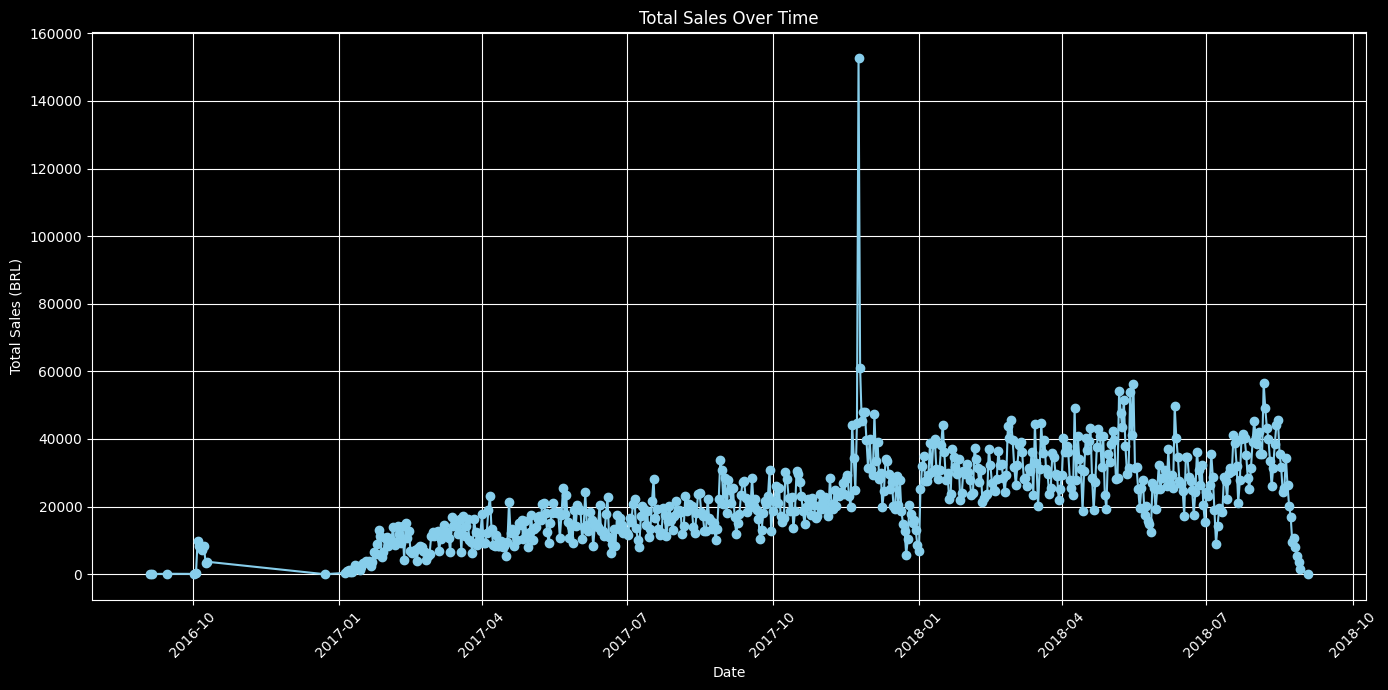

In [14]:
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])

merged_data = pd.merge(olist_orders, olist_order_items, on='order_id')

merged_data['total_sales'] = merged_data['price'] 

total_sales_over_time = merged_data.groupby(merged_data['order_purchase_timestamp'].dt.date)['total_sales'].sum().reset_index()

total_sales_over_time = total_sales_over_time.sort_values('order_purchase_timestamp')

plt.style.use('dark_background')

plt.figure(figsize=(14, 7))
plt.plot(total_sales_over_time['order_purchase_timestamp'], total_sales_over_time['total_sales'], marker='o', color='skyblue')
plt.title('Total Sales Over Time')
plt.ylabel('Total Sales (BRL)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()





Analysis:
Daily Sales Variation: The plot illustrates changes in daily sales volumes throughout the year. The data points on the plot represent the total sales for each day.

Seasonal Trends and Events: There appear to be several peaks and troughs, which could indicate seasonal trends, promotional campaigns, or special sales events. Without specific date markers, we can't identify exact events, but we would look for a particularly high peak to identify Black Friday.

Black Friday Identification: If we had the exact dates on the x-axis, we would identify Black Friday as a significant outlier with sales volumes much higher than the surrounding days. This peak would be visibly distinct from the general trend.

Conclusion:
Impact of Black Friday: Assuming we can pinpoint Black Friday on the plot, it would likely show a sharp spike in sales, confirming that Black Friday significantly impacts overall sales performance, drawing in a high volume of transactions compared to a typical day.

Consumer Behavior: The surge on Black Friday suggests a consumer behavior pattern where customers are likely waiting for big sales events to make purchases, indicating price sensitivity and the effectiveness of discount-driven marketing.

Business Strategy: For the business, this peak would highlight the importance of Black Friday in annual sales strategies, emphasizing the need for adequate stock levels, promotional planning, and resource allocation to cater to the increased demand.

# Machine learning models

In [15]:
merged_data = pd.merge(olist_orders, olist_order_reviews, on='order_id', how='inner')

merged_data = pd.merge(merged_data, olist_order_payments, on='order_id', how='inner')

merged_data = pd.merge(merged_data, olist_order_items, on='order_id', how='inner')

merged_data = pd.merge(merged_data, olist_products, on='product_id', how='inner')

In [16]:
label_encoders = {}

categorical_columns = merged_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    merged_data[column] = le.fit_transform(merged_data[column])
    label_encoders[column] = le

In [17]:
X = merged_data.drop(['review_score'], axis=1)
y = merged_data['review_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LogisticRegression

In [18]:
datetime_cols = merged_data.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    merged_data[col + '_year'] = merged_data[col].dt.year
    merged_data[col + '_month'] = merged_data[col].dt.month
    merged_data[col + '_day'] = merged_data[col].dt.day
    merged_data = merged_data.drop(col, axis=1)


X = merged_data.drop(['review_score'], axis=1)
y = merged_data['review_score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)


lr_report = classification_report(y_test, lr_predictions)
print('Logistic Regression Classification Report:\n', lr_report)



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.11      0.18      3008
           2       0.00      0.00      0.00       798
           3       0.00      0.00      0.00      1987
           4       0.00      0.00      0.00      4471
           5       0.57      0.99      0.73     13202

    accuracy                           0.57     23466
   macro avg       0.23      0.22      0.18     23466
weighted avg       0.40      0.57      0.43     23466



RandomForestClassifier

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:\n", rf_report)


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.56      0.64      3008
           2       0.99      0.17      0.29       798
           3       0.94      0.15      0.26      1987
           4       0.86      0.16      0.27      4471
           5       0.65      0.98      0.78     13202

    accuracy                           0.67     23466
   macro avg       0.84      0.40      0.45     23466
weighted avg       0.74      0.67      0.61     23466



GradientBoostingClassifier

In [20]:
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

gbm_predictions = gbm_model.predict(X_test)

gbm_report = classification_report(y_test, gbm_predictions)
print("GBM Classification Report:\n", gbm_report)


GBM Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.43      0.52      3008
           2       0.60      0.02      0.03       798
           3       0.82      0.01      0.02      1987
           4       0.52      0.01      0.01      4471
           5       0.61      0.99      0.75     13202

    accuracy                           0.61     23466
   macro avg       0.64      0.29      0.27     23466
weighted avg       0.61      0.61      0.49     23466



In [21]:
label_mapping = {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4}

y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train_mapped)

xgb_predictions_mapped = xgb_model.predict(X_test)

inverse_label_mapping = {v: k for k, v in label_mapping.items()}
xgb_predictions = [inverse_label_mapping[pred] for pred in xgb_predictions_mapped]

xgb_report = classification_report(y_test, xgb_predictions)
print("XGBoost Classification Report:\n", xgb_report)


XGBoost Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.60      0.64      3008
           2       0.78      0.10      0.17       798
           3       0.73      0.05      0.10      1987
           4       0.57      0.05      0.10      4471
           5       0.64      0.98      0.77     13202

    accuracy                           0.64     23466
   macro avg       0.68      0.36      0.36     23466
weighted avg       0.64      0.64      0.55     23466



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

reviews_sample = merged_data['review_comment_message'].astype(str).fillna("")


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
reviews_vectorized_sample = tfidf_vectorizer.fit_transform(reviews_sample)


scaler = StandardScaler(with_mean=False)
reviews_scaled_sample = scaler.fit_transform(reviews_vectorized_sample)


scores_sample = merged_data['review_score']


X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    reviews_scaled_sample, scores_sample, test_size=0.33, random_state=42)


from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=[1.0, 2.0, 3.0, 4.0, 5.0], y=y_train_sample)
class_weight_dict = {1.0: class_weights[0], 2.0: class_weights[1], 3.0: class_weights[2], 
                     4.0: class_weights[3], 5.0: class_weights[4]}

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight=class_weight_dict,
    random_state=42,
    n_jobs=-1  
)
rf_model.fit(X_train_sample, y_train_sample)


joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')




['standard_scaler.pkl']

In [27]:
%%writefile app.py

import streamlit as st
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

model = joblib.load('random_forest_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
scaler = joblib.load('standard_scaler.pkl')

st.title("Review Prediction App")

st.sidebar.header('Review Prediction App')
st.sidebar.write("This app predicts the review score based on the content of the review.")

user_input = st.text_area("Enter the review content here:")

if user_input:
    user_input_vectorized = tfidf_vectorizer.transform([user_input])
    user_input_scaled = scaler.transform(user_input_vectorized.toarray())
    
    predicted_class = model.predict(user_input_scaled)[0]
    
    st.write(f"Predicted Review Score: {predicted_class}")





Overwriting app.py


STREAMLIT

In [28]:
%%writefile review_dashboard.py

import streamlit as st
import pandas as pd
import plotly.express as px

# Load datasets
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')

# Convert date columns to datetime
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_order_reviews['review_creation_date'] = pd.to_datetime(olist_order_reviews['review_creation_date'])

# Merge orders and order items datasets to calculate total sales
merged_orders = pd.merge(olist_orders, olist_order_items, on='order_id')
merged_orders['total_sales'] = merged_orders['price']  # Adjust if quantity is available

# Calculate total sales over time
sales_over_time = merged_orders.groupby(merged_orders['order_purchase_timestamp'].dt.date)['total_sales'].sum().reset_index()

# Sidebar filters
st.sidebar.header("Filters")
start_date = st.sidebar.date_input("Start Date", min(sales_over_time['order_purchase_timestamp']))
end_date = st.sidebar.date_input("End Date", max(sales_over_time['order_purchase_timestamp']))

# Filter the merged data based on the selected date range
filtered_sales = sales_over_time[
    (sales_over_time['order_purchase_timestamp'] >= start_date) &
    (sales_over_time['order_purchase_timestamp'] <= end_date)
]

# Filter reviews by date
filtered_reviews = olist_order_reviews[
    (olist_order_reviews['review_creation_date'].dt.date >= start_date) &
    (olist_order_reviews['review_creation_date'].dt.date <= end_date)
]

# Additional filters
days = st.sidebar.multiselect("Select Days of the Week", 
                              ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                              default=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
filtered_reviews = filtered_reviews[filtered_reviews['review_creation_date'].dt.day_name().isin(days)]

min_score, max_score = st.sidebar.slider("Select a Range of Review Scores", 1, 5, (1, 5))
filtered_reviews = filtered_reviews[(filtered_reviews['review_score'] >= min_score) & (filtered_reviews['review_score'] <= max_score)]

# Main page
st.markdown("<h1 style='text-align: left; font-size: 60px;'>Olist dashboard</h1>", unsafe_allow_html=True)

# Number of Reviews by Day of the Week
st.header("Number of Reviews by Day of the Week:")
filtered_reviews['day_of_week'] = filtered_reviews['review_creation_date'].dt.day_name()
reviews_by_day = filtered_reviews['day_of_week'].value_counts().reindex(days).reset_index()
reviews_by_day.columns = ['Day of the Week', 'Number of Reviews']
fig_reviews_by_day = px.bar(reviews_by_day, x='Day of the Week', y='Number of Reviews', 
                            template='plotly_dark')
st.plotly_chart(fig_reviews_by_day)

# Distribution of Review Scores
st.header("Distribution of Review Scores:")
review_counts = filtered_reviews['review_score'].value_counts().sort_index().reset_index()
review_counts.columns = ['Review Score', 'Number of Reviews']
fig_review_counts = px.bar(review_counts, x='Review Score', y='Number of Reviews',  
                           template='plotly_dark')
st.plotly_chart(fig_review_counts)

# KPI: Average Review Score
st.header("What is the average review score for orders within a specified date range?")
average_review_score = filtered_reviews['review_score'].mean()
st.metric(label="Average Review Score:", value=f"{average_review_score:.2f}")

# Total Sales Over Time
st.header("Total Sales Over Time:")
fig_sales_over_time = px.line(
    filtered_sales,
    x='order_purchase_timestamp',
    y='total_sales',
    template='plotly_dark'
)
st.plotly_chart(fig_sales_over_time)


Overwriting review_dashboard.py


Business problem:
Olist has been receiving a significant number of product reviews from its customers. 
While many reviews are positive, there's a noticeable number of negative reviews. 
The company needs to identify the factors that lead to customer dissatisfaction and predict the likelihood of negative reviews to proactively address issues and improve the overall customer experience.
To address this problem we will develop machine learning models.




Insights and findings:
The RandomForest Classifier serves as a powerful tool for Olist to use their data in making informed decisions to improve the overall customer experience.
The model performs well in identifying highly satisfied customers. 
Further work is needed to improve its ability to catch dissatisfied customers.
